<h1>Wisconsin Diagnostic Breast Cancer (WDBC)</h1>
<br>
<br>
<h3>Source Information:</h3>
<br>
<p style="font-size:16px">Creators:<br>
<br>
Dr. William H. Wolberg, General Surgery Dept., University of Wisconsin,  Clinical Sciences Center, Madison, WI 53792
wolberg@eagle.surgery.wisc.edu<br>
<br>
W. Nick Street, Computer Sciences Dept., University of
Wisconsin, 1210 West Dayton St., Madison, WI 53706
street@cs.wisc.edu  608-262-6619<br>
<br>
Olvi L. Mangasarian, Computer Sciences Dept., University of
Wisconsin, 1210 West Dayton St., Madison, WI 53706
olvi@cs.wisc.edu<br>
<br>
Donor: Nick Street<br>
<br>
Date: November 1995</p>
<br>
<h3>Data Set Information:</h3>
<br>
<p style="font-size:16px">Each record represents follow-up data for one breast cancer case. These are consecutive patients seen by Dr. Wolberg since 1984, and include only those cases exhibiting invasive breast cancer and no evidence of distant metastases at the time of diagnosis.<br>
<br>
Breast cancer is cancer that forms in the cells of the breasts. After skin cancer, breast cancer is the most common cancer diagnosed in women in the United States. Breast cancer can occur in both men and women, but it's far more common in women.<br>
<br>
Substantial support for breast cancer awareness and research funding has helped created advances in the diagnosis and treatment of breast cancer. Breast cancer survival rates have increased, and the number of deaths associated with this disease is steadily declining, largely due to factors such as earlier detection, a new personalized approach to treatment and a better understanding of the disease.(<a href>https://www.mayoclinic.org/diseases-conditions/breast-cancer/symptoms-causes/syc-20352470)</a>
<br>
<h3>Attribute information:</h3>
<br>
<p style="font-size:16px">1) ID number<br>
2) Diagnosis (M = malignant, B = benign)<br>
3-32)<br>
<br>
<h3>Ten real-valued features are computed for each cell nucleus:</h3>
<br>
a) radius (mean of distances from center to points on the perimeter)<br>
b) texture (standard deviation of gray-scale values)<br>
c) perimeter<br>
d) area<br>
e) smoothness (local variation in radius lengths)<br>
f) compactness (perimeter^2 / area - 1.0)<br>
g) concavity (severity of concave portions of the contour)<br>
h) concave points (number of concave portions of the contour)<br>
i) symmetry<br>
j) fractal dimension ("coastline approximation" - 1)<br>
<br>
<h3>The aim of this tutorial: </h3>
<p style="font-size:16px">is to use the Machine Learning Algorithm from Decision Tree and Random Forest to determine the percentage of methastases detected. After that, I would like to see whether I can achieve better results with the KNN algorithm. At the finish I will compare both results.</p>
<h3>Source:</h3> 
<p style="font-size:16px">This database is available through the UW CS ftp server and on the UCI Machine Learning Repository: <a href>https://archive.ics.uci.edu</a>

In [1]:
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn import metrics # for confusion matrix

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

In [4]:
dataset = read_csv(url, header=None)

In [5]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [7]:
# Dataset has 569 entries and consists of 32 columns. Dataset hasn't any null values or missing data.

In [8]:
dataset.describe()

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<br>
<h2>Exploratory anaylsis</h2>

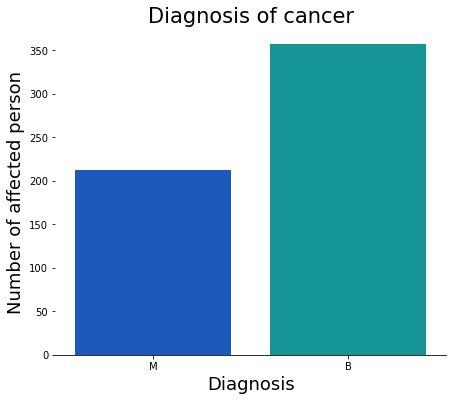

In [9]:
ax=sns.countplot(data=dataset, x=1, palette="winter")
ax.set_title("Diagnosis of cancer", fontsize=21)
ax.set_xlabel("Diagnosis", fontsize=18)
ax.set_ylabel("Number of affected person", fontsize=18)
fig=plt.gcf()
fig.set_size_inches(7,6)
sns.despine(left=True)

In [10]:
dataset[1].value_counts() 

B    357
M    212
Name: 1, dtype: int64

<p style="font-size:18px">Distribution Class: diagnosis "Benign" has 357 patients and "Malignant" 212 patients.<7p>

In [11]:
dataset.drop([0], axis=1, inplace=True)  # The Column Index will not be needed for the work. So i drop it.

In [12]:
dataset.head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000226DC6DE370>,
      dtype=object)

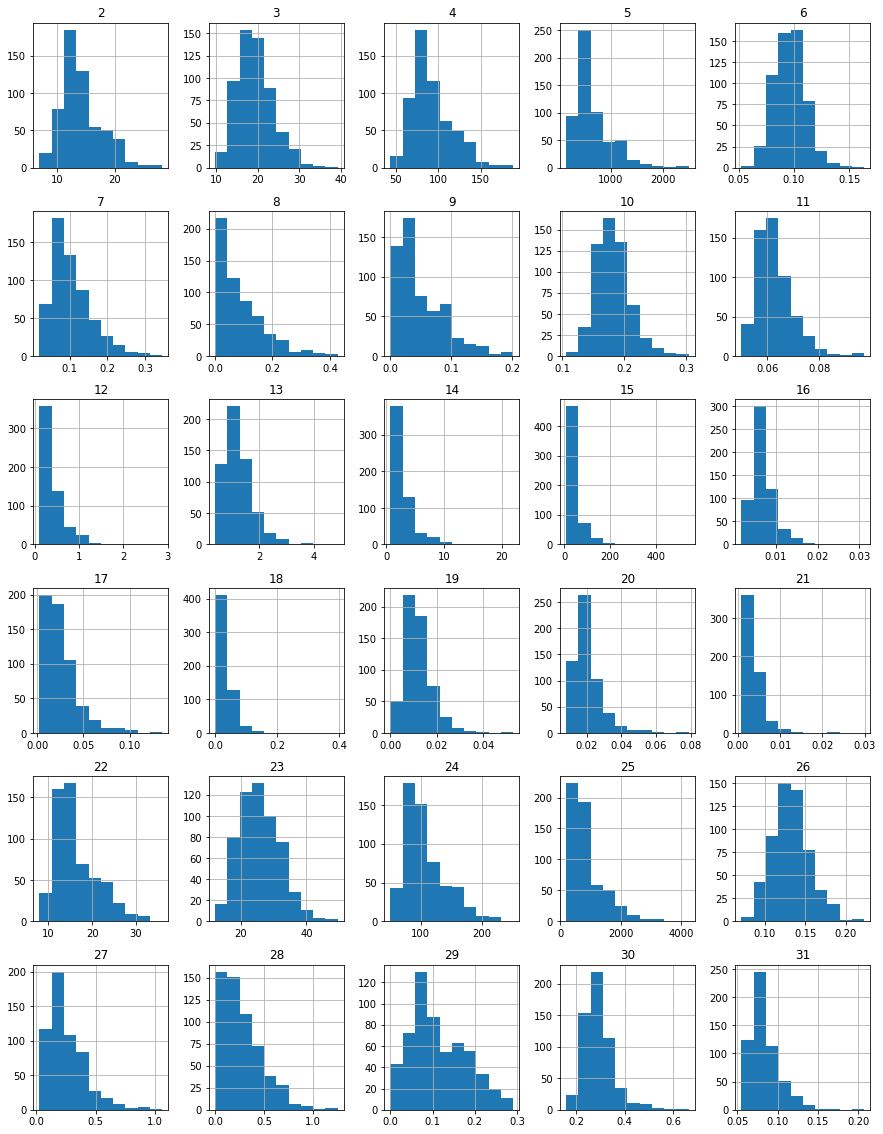

In [13]:
dataset.hist(figsize=(15,20))

<h3> Split Data into testdata and traindata</h3>

In [14]:
X = dataset.drop([1], axis=1)
y = dataset[1]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=4)

<h3>Decision Tree Algorithm<h3>

In [16]:
dtree = DecisionTreeClassifier() # Create Dtree Object

In [17]:
dtree.fit(X_train, y_train) # train Data

DecisionTreeClassifier()

In [18]:
dtree_predictions = dtree.predict(X_test) # Prediction

In [19]:
print(classification_report(y_test, dtree_predictions))

              precision    recall  f1-score   support

           B       0.97      0.93      0.95       117
           M       0.86      0.94      0.90        54

    accuracy                           0.94       171
   macro avg       0.92      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



<p style="font-size:18px">The occuracy = 94%. The Modell shows precision 97% for "B" (Benign diagnose) and 86% for "M" (Malignant diagnose)<7p>

In [20]:
cnf_matrix = metrics.confusion_matrix(y_test, dtree_predictions)
cnf_matrix

array([[109,   8],
       [  3,  51]], dtype=int64)

Text(0.5, 257.44, 'Predicted condition')

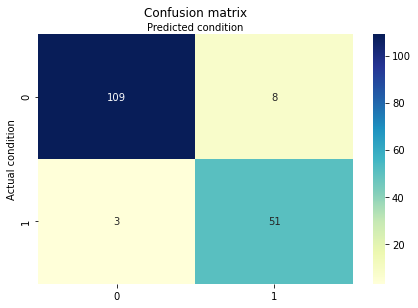

In [21]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual condition')
plt.xlabel('Predicted condition')

<p style="font-size:18px">Confusion Matrix shows folloved results:<br>
<br>
109 was correctly identified as those who had diagnosis "B" (benign tumor). 51 - was recognized as disgnosis "M" (malignant tumor).<br>
False positive - 8 patients who had a benign tumor were classified as malignant.<br>
False negative - 3 patients who had a malignant tumor were classified as benign.</p>

# Random Forest algorithm

In [22]:
rfc = RandomForestClassifier() ## Create rfc Object

In [23]:
rfc.fit(X_train, y_train) # train data

RandomForestClassifier()

In [24]:
rfc_predict = rfc.predict(X_test) # predictions

In [25]:
print(classification_report(y_test, rfc_predict))

              precision    recall  f1-score   support

           B       0.97      0.94      0.96       117
           M       0.88      0.94      0.91        54

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



<p style="font-size:16px">Random Forest Algorithm shows better accuracy of 94%, but the precision and recall have decreased slightly.<7p>

In [26]:
cnf_matrix = metrics.confusion_matrix(y_test, rfc_predict)
cnf_matrix

array([[110,   7],
       [  3,  51]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

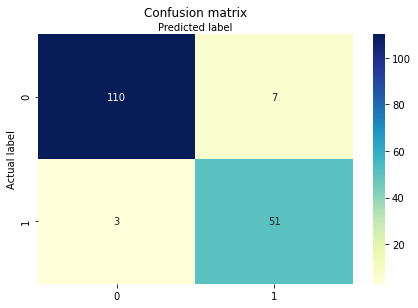

In [27]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<p style="font-size:18px">Confusion Matrix shows the following results:<br>
<br>
110 were correctly identified as those who had diagnosis "B" (benign tumor). 51 were recognized as a malignant tumor.<br>
False positive - 7 patients who had a benign tumor were classified as malignant.<br>
False negative - 3 patients who had a malignant tumor were classified as benign.</p>
<br>
<br>

<h2>Lets see, if we get with KNN Algorithm better results.</h2>

<h3>Modelling Standart Scaler</h3>

In [28]:
dataset_1 = dataset.copy()

In [29]:
dataset_1.head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [30]:
scaler = StandardScaler() # Rescaling Features

In [31]:
scaler.fit(dataset_1.drop([1], axis=1))

StandardScaler()

In [32]:
scaler_features = scaler.transform(dataset_1.drop([1], axis=1))

In [33]:
scaler_features

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [34]:
scaler_featured = pd.DataFrame(scaler_features) # Converting rescaled data into dataframe

In [35]:
scaler_featured.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [36]:
# Split data
X = scaler_featured
y = dataset_1[1]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

<h3>KNN - Algorithm<7h3>

In [38]:
knn = KNeighborsClassifier() # Create KNN object

In [39]:
knn.fit(X_train, y_train) # train data

KNeighborsClassifier()

In [40]:
knn_pred = knn.predict(X_test) # predictions

In [41]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           B       0.98      0.96      0.97       117
           M       0.91      0.96      0.94        54

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.96      0.96      0.96       171



In [42]:
cnf_matrix = metrics.confusion_matrix(y_test, knn_pred)
cnf_matrix

array([[112,   5],
       [  2,  52]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

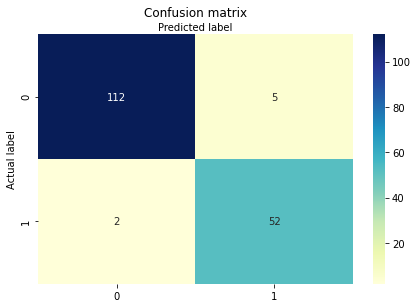

In [43]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<p style="font-size:16px">Confusion Matrix shows folloved results:<br>
<br>
112 was correctly identified as those who had diagnosis B (benign tumor). 52 - was recognized as a malignant tumor.<br>
False positive - 5 patients who had a benign tumor were classified as malignant.<br>
False negative - 2 patients who had a malignant tumor were classified as benign.</p>

<h2>Choose the k Value</h2>

In [44]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

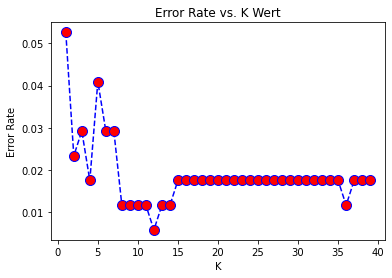

In [45]:
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Wert')
plt.xlabel('K')
plt.ylabel('Error Rate')

<h3>Train with the new K value</h3>

In [46]:
# With K10
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print("With K=10")
print("\n")
print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))

With K=10


[[117   0]
 [  2  52]]


              precision    recall  f1-score   support

           B       0.98      1.00      0.99       117
           M       1.00      0.96      0.98        54

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



<h2>Conclusion:</h2>
<p style="font-size:16px">Wow, accuracy of the Modell reach 99%! Impressing!<br>     
Model recognized all diagnosed "B" and most of diagnosed "M". Precision with diagnosis "M" is 100%, with "B" - 98%. The f1-score is very high too.<br>
With this Algorithm I reached the highest result.</p> 